In [1]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.insert(0, modules_path)

from equilibrium import Equilibrium
from microstates import Microstates
from sweep import ConcentrationSweep

import numpy as np
import matplotlib.pyplot as plt
from time import time

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Set parameters (alpha, beta, gamma)

In [2]:
eq = Equilibrium()
dG_specific = eq.get_dG(25e-12) # 25 pM KD for ETS-1 and specific sites
dG_nonspecific = eq.get_dG(10e-6) # 10 uM KD for ETS-1 and non-specific sites

In [3]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [dG_specific, a0] 
beta = [dG_nonspecific, b0] 
gamma = [.8*c0, c0] 
params = dict(alpha=alpha, beta=beta, gamma=gamma)

# Set concentrations

In [4]:
sweep = ConcentrationSweep(cmin=(0, 0), cmax=(100, 100), Nc=(25, 25))

# Compute binding site occupancies

In [9]:
ets = (0,) # define strong binding site positions

# compute occupancies for different binding element sizes (normally I just define a single Ns value, eg Ns=12)
occupancies = {}
for Ns in range(1, 12):
    microstates = Microstates(Ns=10, params=params, ets=ets)
    occupancies[Ns] = sweep.get_occupancies(microstates)

# Visualize results

In [14]:
Ns = 11
occupancy = occupancies[Ns]

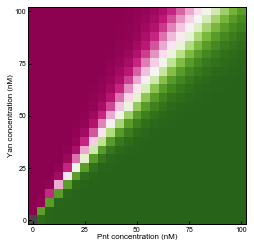

In [15]:
fig = occupancy.plot_overall_occupancy(species='Pnt', cmap=plt.cm.PiYG, mask=True)

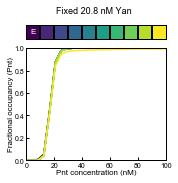

In [16]:
fig = occupancy.plot_contours(species='Pnt', variable='Pnt', fixed=5, figsize=(2.5, 2.5))

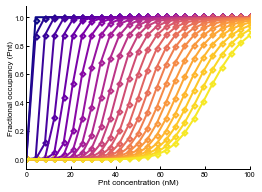

In [17]:
_ = occupancy.show_model()

In [29]:
# occupancies are stored in a the "occupancies" attribute (Ns x Nc^2 x 3 array)
# first dimension corresponds to binding site position
# second dimension corresponds to a unique pair of protein concentrations
# third dimension corresponds to frequency empty, Pnt-bound, and Yan-bound sites

# example: frequency with which 5th binding position is occupied by Pnt
example = occupancy.occupancies[5, :, 1]